# Data Project 1


## Question 1


**1.1. Basics** 

Using table PRIS113 from Denmark Statistics produce figures with, respectively,
1. The consumer price index (CPI), Pt, indexed to 100 on average in 2020
2. The month-to-month inflation rate, πt = Pt/Pt−1 − 1
3. The 12-month inflation rate, π12t = Pt/Pt−12 − 1

*Importing necessary libraries from the API lecture*

In [1]:
#Importing necessary libraries from the API lecture
import numpy as np
import pandas as pd

# APIs
from dstapi import DstApi
from fredapi import Fred

#Importing plotting libraries
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})

*With the necessary imports done, we can now initialize the API for table PRIS113 and fetch its metadata:*

In [62]:
# Calls API from DST
Pris113 = DstApi('PRIS113') 

# Getting a quick overview of the data
Pris113.tablesummary(language='en')

# Get parameters
params = Pris113.define_base_params(language='en') 

# Get data
df = Pris113.get_data(params=params, language='en')




Table PRIS113: Consumer price index by type and time
Last update: 2025-10-10T08:00:00


In [61]:
#Setting up model
t = [c for c in df if c.lower() in ('tid','time')][0]                                       #Finding "Time" column in df
y = [c for c in df if c.lower() in ('indhold','value','obs_value','data')][0]               #Finding "Value" column in df
c = df[df['TYPE'].str.lower()=='consumer price index'].copy()                               #Compiling data for CPI only ("Time" and "Value" columns)
c['date'] = pd.to_datetime(c[t].str.replace('M','-') + '-01')                               #Creating date format column

P = pd.to_numeric(c[y]); P.index = c['date']; P = P.sort_index()                            #Creating series P with variables 
P

date
1980-01-01     33.0
1980-02-01     33.3
1980-03-01     33.8
1980-04-01     34.0
1980-05-01     34.5
              ...  
2025-05-01    120.4
2025-06-01    120.7
2025-07-01    122.5
2025-08-01    121.7
2025-09-01    121.6
Name: INDHOLD, Length: 549, dtype: float64

*Now, we can set up the model for the CPI and plot it:*

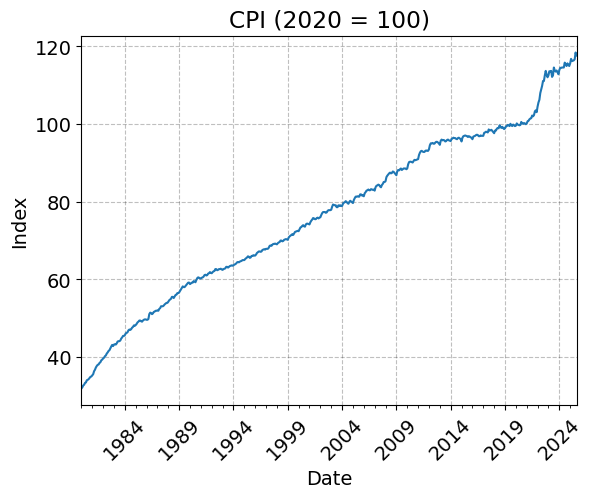

In [72]:
# Laver plot til 1.1
P11 = P * (100 / P[P.index.year==2020].mean())                                                #Indexing P to 100 in 2020 

#Creating plot 'CPI (2020=100)'
P11.plot(title="CPI (2020 = 100)");                                                           #Making plot
plt.xlabel("Date"); plt.ylabel("Index");
plt.xticks(rotation=45);
plt.show()



**Description of the CPI plot:**

The resulting plot shows CPI over time, indexed to 100 in 2020. The overall trend indicates a steady increase in consumer prices over the years, reflecting continuous inflationary pressures, with the most abrupt rise occurring in the months after 2020. Fluctuations occur on the somewhat steady trend until 2000, after which the CPI continues to rise but with more pronounced fluctuations. A significant spike is observed around 2021-2022, likely due to economic disruptions caused by the COVID-19 pandemic and subsequent recovery efforts. The CPI seems to stabilize itself to normal levels after this period, with more moderate increases, but also more fluctuations in comparison to pre-2000 levels.
The sudden spikes in fluctuations in the early 2000s and around 2021-2022 could be attributed to major economic events, such as the dot-com bubble burst and the global financial crisis in the early 2000s, and the COVID-19 pandemic in 2020-2021. These events likely caused significant disruptions in supply chains, changes in consumer behavior, and shifts in monetary policy, all of which can lead to increased volatility in consumer prices.

*Now, we can setup the model for the month-to-month inflation rate and plot it:*

In [64]:
P12 = P.reset_index()
P12

,date,INDHOLD
0,1980-01-01,33.0
1,1980-02-01,33.3
2,1980-03-01,33.8
3,1980-04-01,34.0
4,1980-05-01,34.5
...,...,...
544,2025-05-01,120.4
545,2025-06-01,120.7
546,2025-07-01,122.5
547,2025-08-01,121.7


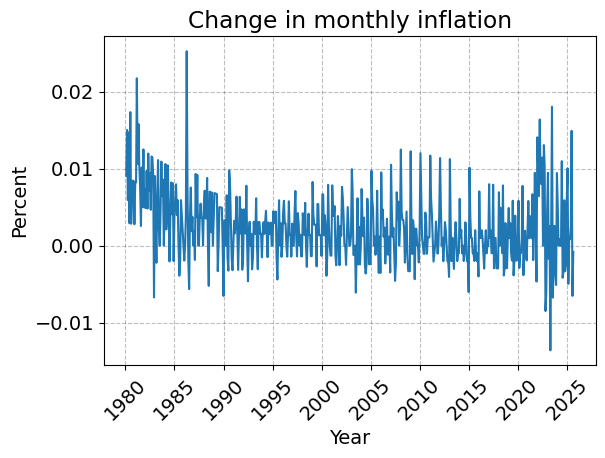

In [71]:
#Creating plot
# Setting up model for month-to-month inflation rate

pi = P12['INDHOLD'].pct_change()


plt.plot(P12['date'], pi)
plt.title("Change in monthly inflation")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Percent")
plt.tight_layout()
plt.show()

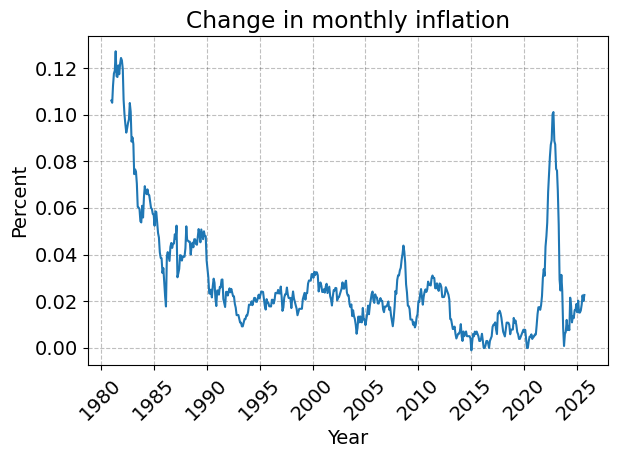

In [69]:
p3 = P12['INDHOLD'].pct_change(12)

plt.plot(P12['date'], p3)
plt.title("Change in monthly inflation")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Percent")
plt.tight_layout()
plt.show()

**1.2 - Instantanious Inflation**

In [ ]:
# Import FRED API key, change!
fred = Fred(api_key="db9c8e25f99324194789f99eb26f0ce7") # <. here we set up the Fred API object

# define parameters / series we want to download
series = {
     "CP0000DKM086NEST":"hicp"
}

# use this code to download and store data
data = {}
for code,name in series.items():
    var = fred.get_series(code)
    var.name = name
    data[name] = var
    print(f'Downloaded {code:15s} from FRED and saved it as {name:15s}')

Downloaded CP0000DKM086NEST from FRED and saved it as hicp           


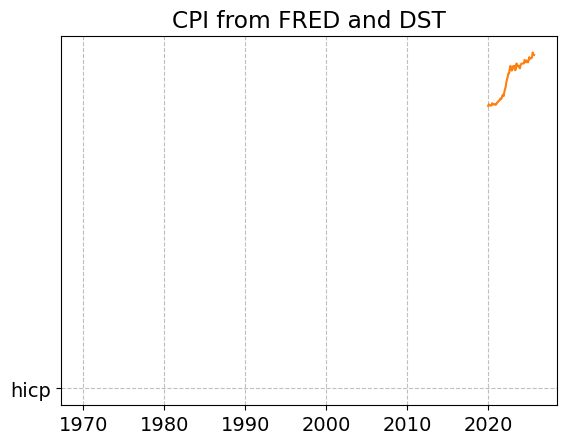

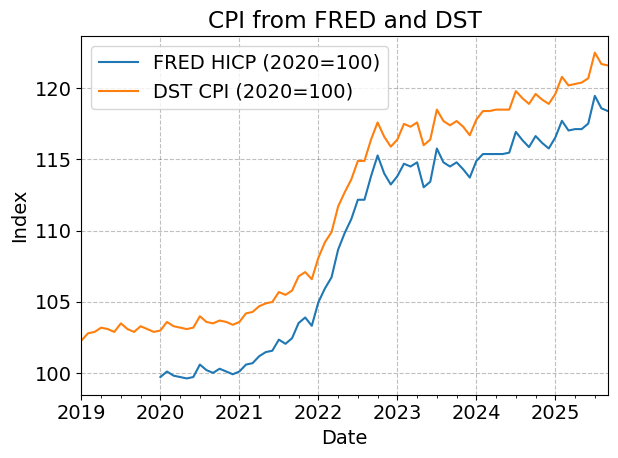

In [ ]:
# only dataafter 2019
data['hicp'] = data['hicp'][data['hicp'].index.year > 2019]
data['pris113_cpi'] = P[P.index.year > 2019]

plt.plot('hicp')
plt.plot(data['pris113_cpi'])
plt.title("CPI from FRED and DST")
plt.show()

# 1) vælg data fra 2019 og frem
hicp = data['hicp'].loc['2019':].copy()
pris = P.loc['2019':].copy()   # DST CPI

# 2) rebase FRED HICP til 2020=100 (DST er allerede 2020=100)
hicp = hicp * (100 / hicp.loc['2020'].mean())

# 3) plot begge serier
pd.concat([
    hicp.rename('FRED HICP (2020=100)'),
    pris.rename('DST CPI (2020=100)')
], axis=1).plot(title="CPI from FRED and DST")
plt.xlabel("Date"); plt.ylabel("Index"); plt.tight_layout(); 
plt.show()


In [ ]:
Pris113 = DstApi('PRIS113')

# 2) (valgfrit) Overblik over variabler og gyldige koder
meta = Pris113.tablesummary(language='en')  # viser variabelnavne
print(meta)

# 3) Basis-parameter-sæt
try:
    params = Pris113.define_base_params(language='en')  # public helper (hvis tilgængelig)
except AttributeError:
    params = Pris113._define_base_params(language='en') # fallback i nogle versioner

# params er nu á la:
# {'table':'pris113','format':'BULK','lang':'en','variables':[{'code':'...','values':['*']}, ..., {'code':'Tid','values':['*']}]}

# 4) Begræns udtrækket (anbefales). Eksempel:
for v in params['variables']:
    if v['code'].lower() in ('tid','time'):
        v['values'] = ['*']     # fx alle perioder fra 2019 og frem
    # Ellers kan du sætte specifikke koder pr. variabel, når du har slået dem op:
    # if v['code'] == 'VAREGRUPPE': v['values'] = ['TOT']  # eksemplificeret – brug reel kode fra variable_levels()

# 5) Hent data (nu kommer værdierne med)
df = Pris113.get_data(params=params, language='en')
print(df.head())


Table PRIS113: Consumer price index by type and time
Last update: 2025-10-10T08:00:00
  variable name  # values First value     First value label Last value  \
0          TYPE         1      INDEKS  Consumer price index     INDEKS   
1           Tid       549     1980M01               1980M01    2025M09   

       Last value label  Time variable  
0  Consumer price index          False  
1               2025M09           True  
                   TYPE      TID INDHOLD
0  Consumer price index  1980M02    33.3
1  Consumer price index  1980M06    34.6
2  Consumer price index  1980M10    35.8
3  Consumer price index  1981M02    36.8
4  Consumer price index  1981M06    39.0
